In [21]:
#IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd # UNTUK MEMANIPULASI DATA (MEMBACA DATA CSV)
import numpy as np # UNTUK MANUPULASI DATA (MENGUBAH LIST MENJADI ARRAY)
import seaborn as sns #MENAMPILKAN GRAFIK
import matplotlib.pyplot as plt #MENAMPILKAN GRAFIK
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix # UNTUK MELAKUKAN EVALUASI MODEL MATRIKS

In [22]:
#IMPORT DATASET DAN MENAMPILKAN DATASET
dataset = pd.read_csv('data.csv')
dataset

,no,nama_lengkap,jenis_kelamin,kelurahan,penghasilan,jumlah_penghuni,kondisi_dinding,kondisi_lantai,kondisi_atap,status_penerimaan
0,1,Budy Hartono Santosa,Laki-laki,Aia Bangih,5570000,8,Rusak Sedang,Rusak Berat,Rusak Sangat Ringan,Tidak
1,2,Eddi Sugiardi,Laki-laki,Aia Bangih,6920000,1,Rusak Berat,Rusak Berat,Rusak Berat,Ya
2,3,Efrem Wardhana,Laki-laki,Aia Bangih,9460000,9,Rusak Ringan,Rusak Sedang,Rusak Sangat Berat,Tidak
3,4,Eko Prasetyo Ang,Laki-laki,Aia Bangih,880000,8,Rusak Ringan,Rusak Sedang,Rusak Sangat Berat,Tidak
4,5,Evan,Laki-laki,Aia Bangih,4770000,12,Rusak Sangat Ringan,Rusak Ringan,Rusak Sangat Ringan,Tidak
...,...,...,...,...,...,...,...,...,...,...
295,296,Katharina Wihardja,Perempuan,Ujung Gading,3740000,11,Rusak Sangat Ringan,Rusak Ringan,Rusak Sangat Ringan,Tidak
296,297,Mohamad Noer,Laki-laki,Ujung Gading,2110000,9,Rusak Sedang,Rusak Berat,Rusak Sangat Berat,Tidak
297,298,Mohammad Hidayat Hasan,Laki-laki,Ujung Gading,4190000,4,Rusak Sedang,Rusak Berat,Rusak Sangat Ringan,Tidak
298,299,Wahjudin Judiana Ardiwinata,Laki-laki,Ujung Gading,5020000,12,Rusak Sangat Berat,Rusak Berat,Rusak Sangat Berat,Ya


In [23]:
#MELIHAT INFO DATASET
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   no                 300 non-null    int64 
 1   nama_lengkap       300 non-null    object
 2   jenis_kelamin      300 non-null    object
 3   kelurahan          300 non-null    object
 4   penghasilan        300 non-null    int64 
 5   jumlah_penghuni    300 non-null    int64 
 6   kondisi_dinding    300 non-null    object
 7   kondisi_lantai     300 non-null    object
 8   kondisi_atap       300 non-null    object
 9   status_penerimaan  300 non-null    object
dtypes: int64(3), object(7)
memory usage: 23.6+ KB


In [24]:
#MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN UNTUK ANALISIS
predata_hasil = dataset.drop(["no", "nama_lengkap", "jenis_kelamin", "kelurahan"], axis=1)

#MENAMPILKAN NAMA KOLOM YANG DIPERLUKAN
predata_hasil.columns

Index(['penghasilan', 'jumlah_penghuni', 'kondisi_dinding', 'kondisi_lantai',
       'kondisi_atap', 'status_penerimaan'],
      dtype='object')

In [25]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA STATUS PENERIMAAN
def status_penerimaan(value1):
  if value1 == "Ya":
    return 1
  elif value1 == "Tidak":
    return 0

predata_hasil['status_penerimaan'] = predata_hasil['status_penerimaan'].apply(status_penerimaan)
display(predata_hasil['status_penerimaan'])

0      0
1      1
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    1
299    1
Name: status_penerimaan, Length: 300, dtype: int64

In [26]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA PENGHASILAN
def penghasilan(value1):
  if value1 >= 0 and value1 <= 1000000:
    return 1
  elif value1 > 1000000 and value1 <= 2000000:
    return 2
  elif value1 > 2000000 and value1 <= 3000000:
    return 3
  elif value1 > 3000000 and value1 <= 4000000:
    return 4
  elif value1 > 4000000:
    return 5

predata_hasil['penghasilan'] = predata_hasil['penghasilan'].apply(penghasilan)
display(predata_hasil['penghasilan'])

0      5
1      5
2      5
3      1
4      5
      ..
295    4
296    3
297    5
298    5
299    5
Name: penghasilan, Length: 300, dtype: int64

In [27]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA JUMLAH PENGHUNI
def jumlah_penghuni(value1):
  if value1 == 1:
    return 5
  elif value1 > 1  and value1 <= 3:
    return 4
  elif value1 > 3 and value1 <= 5:
    return 3
  elif value1 > 5 and value1 <= 7:
    return 2
  elif value1 >= 8:
    return 1

predata_hasil['jumlah_penghuni'] = predata_hasil['jumlah_penghuni'].apply(jumlah_penghuni)
display(predata_hasil['jumlah_penghuni'])

0      1
1      5
2      1
3      1
4      1
      ..
295    1
296    1
297    3
298    1
299    5
Name: jumlah_penghuni, Length: 300, dtype: int64

In [28]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA KONDISI ATAP DAN KONDISI DINDING
def kondisi_atap_dinding(value1):
  if value1 == "Rusak Sangat Berat":
    return 5
  elif value1 == "Rusak Berat":
    return 4
  elif value1 == "Rusak Sedang":
    return 3
  elif value1 == "Rusak Ringan":
    return 2
  elif value1 == "Rusak Sangat Ringan":
    return 1

predata_hasil['kondisi_atap'] = predata_hasil['kondisi_atap'].apply(kondisi_atap_dinding)
display(predata_hasil['kondisi_atap'])

predata_hasil['kondisi_dinding'] = predata_hasil['kondisi_dinding'].apply(kondisi_atap_dinding)
display(predata_hasil['kondisi_dinding'])

0      1
1      4
2      5
3      5
4      1
      ..
295    1
296    5
297    1
298    5
299    4
Name: kondisi_atap, Length: 300, dtype: int64

0      3
1      4
2      2
3      2
4      1
      ..
295    1
296    3
297    3
298    5
299    2
Name: kondisi_dinding, Length: 300, dtype: int64

In [29]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA KONDISI LANTAI
def kondisi_lantai(value1):
  if value1 == "Rusak Berat":
    return 5
  elif value1 == "Rusak Sedang":
    return 3
  elif value1 == "Rusak Ringan":
    return 1

predata_hasil['kondisi_lantai'] = predata_hasil['kondisi_lantai'].apply(kondisi_lantai)
display(predata_hasil['kondisi_lantai'])

0      5
1      5
2      3
3      3
4      1
      ..
295    1
296    5
297    5
298    5
299    3
Name: kondisi_lantai, Length: 300, dtype: int64

In [30]:
#TAMPILAN DATASET SETELAH KONVERSI
predata_hasil

,penghasilan,jumlah_penghuni,kondisi_dinding,kondisi_lantai,kondisi_atap,status_penerimaan
0,5,1,3,5,1,0
1,5,5,4,5,4,1
2,5,1,2,3,5,0
3,1,1,2,3,5,0
4,5,1,1,1,1,0
...,...,...,...,...,...,...
295,4,1,1,1,1,0
296,3,1,3,5,5,0
297,5,3,3,5,1,0
298,5,1,5,5,5,1


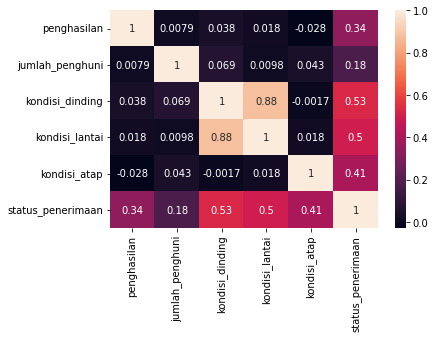

In [31]:
#KORELASI ANTAR VARIABEL
sns.heatmap(predata_hasil.corr(), annot=True)

In [32]:
#MENENTUKAN VARIABEL DEPENDEN DAN INDEPENDEN
X = predata_hasil[['penghasilan', 'jumlah_penghuni', 'kondisi_dinding', 'kondisi_atap', 'kondisi_lantai']]
y = predata_hasil['status_penerimaan']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [35]:
#Model SVM terhadap Training Set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=1, C=100)
classifier.fit(X_train, y_train)

SVC(C=100, random_state=1)

In [36]:
#Prediksi hasil akurasi
from sklearn import metrics
y_pred = classifier.predict(X_test)
print("hasil akurasi :", metrics.accuracy_score(y_test,y_pred))

hasil akurasi : 0.9833333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


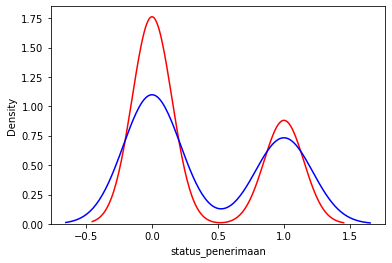

In [37]:
a = sns.distplot(predata_hasil['status_penerimaan'], hist=False, color='r', label='Nilai Aktual')
sns.distplot(y_pred, hist=False, color='b', label='Nilai Prediksi', ax=a)

In [38]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R2 score untuk SVM ',r2_score(y,classifier.predict(X)))
print('Mean Absolute Error untuk SVM ', mean_absolute_error(y, classifier.predict(X)))
print('Mean Squared Error untuk SVM', mean_squared_error(y,classifier.predict(X)))
print('Root Mean Square error untuk SVM ',sqrt(mean_squared_error(y,classifier.predict(X))))
print('Mean Absolute Percentage Error untuk SVM', mean_absolute_percentage_error(y,classifier.predict(X)))

R2 score untuk SVM  -0.5899999999999999
Mean Absolute Error untuk SVM  0.35333333333333333
Mean Squared Error untuk SVM 0.35333333333333333
Root Mean Square error untuk SVM  0.594418483337567
Mean Absolute Percentage Error untuk SVM 90071992547410.25


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.96      1.00      0.98        23

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



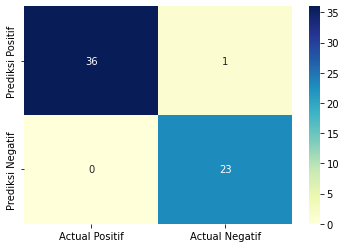

In [39]:
#EVALUASI
print(classification_report(y_test, y_pred)) #MENAMPILKAN HASIL MATRIKS PREDIKSI

#MENAMPILKAN HASIL REPORT KLASIFIKASI
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positif', 'Actual Negatif'],
                                    index = ['Prediksi Positif', 'Prediksi Negatif'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

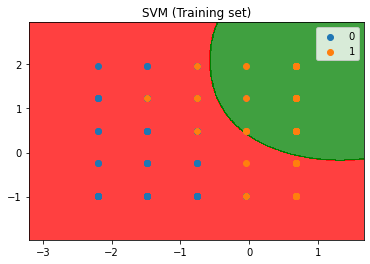

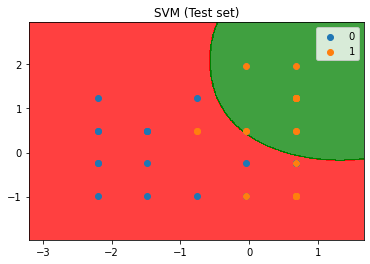

In [40]:
#visualisasi data training dengan kernel RBF
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size)for _ in range(3)]).T
pred = classifier.predict(Xpred).reshape(X1.shape)
plt.contourf(X1, X2, pred, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('SVM (Training set)')

plt.legend()
plt.show()

# Visualisasi model SVM terhadap Test set dengan Kernel RBF
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(3)]).T
pred = classifier.predict(Xpred).reshape(X1.shape)
plt.contourf(X1, X2, pred, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('SVM (Test set)')

plt.legend()
plt.show()

In [41]:
#Membuat nilai probabilitas untuk digunakan pada evaluasi ROC
random_probs = [0 for _ in range(len(y_test))]
classifier_probs = classifier.predict(X_test)
classifier_probs

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [42]:
#Menghitung nilai ROC dan AUCROC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix # UNTUK MELAKUKAN EVALUASI MODEL MATRIKS
random_auc = roc_auc_score(y_test, random_probs)
classifier_auc = roc_auc_score(y_test, classifier_probs)

print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('SVM = %.3f' % (classifier_auc))

Random Prediction : AUCROC = 0.500
SVM = 0.986


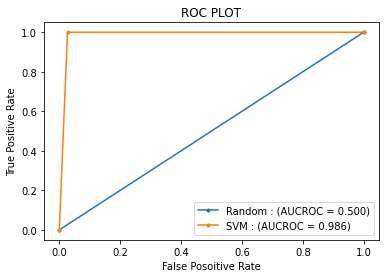

In [43]:
#Membuat kurva dari ROC sebagai model evaluasi
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
classifier_fpr, classifier_tpr, _ = roc_curve(y_test, classifier_probs)

plt.plot(random_fpr, random_tpr, marker=".", label = "Random : (AUCROC = %.3f)" % random_auc)
plt.plot(classifier_fpr, classifier_tpr, marker=".", label = "SVM : (AUCROC = %.3f)" % classifier_auc)

plt.title("ROC PLOT")
plt.xlabel("False Posoitive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()